In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor

C:\New folder\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
import matplotlib.pyplot as plt

In [3]:
from scipy.stats import chi2_contingency
import seaborn as sns

In [4]:
os.chdir("C:/users/user")

In [5]:
pwd

'C:\\users\\user'

In [53]:
#load the data
df= pd.read_csv("Absenteeism_at_work_Project.csv")

In [7]:
df.shape

(740, 21)

In [8]:
#head or top of the dataset
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,"239,554",...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,"239,554",...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,"239,554",...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,"239,554",...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,"239,554",...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


In [9]:
df.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [10]:
#getting the structure of the dataset
type(df)

pandas.core.frame.DataFrame

In [11]:
#unique value in the variables
df['Day of the week'].unique()

array([3, 4, 5, 6, 2], dtype=int64)

In [12]:
#summary of the variable
df.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,737.000000,739.000000,740.000000,740.000000,733.000000,737.000000,737.000000,737.000000,734.000000,734.000000,730.000000,734.000000,737.000000,736.000000,738.000000,739.000000,726.000000,709.000000,718.000000
mean,18.017568,19.188602,6.319350,3.914865,2.544595,221.035471,29.667571,12.565807,36.449118,94.587193,0.053134,1.295890,1.017711,0.567164,0.073370,0.746612,79.063599,172.152893,26.684062,6.977716
std,11.021247,8.437493,3.435948,1.421675,1.111831,66.954179,14.848124,4.389813,6.480148,3.792705,0.224453,0.676965,1.094928,0.495805,0.260919,1.319726,12.868630,6.081065,4.292819,13.476962
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,93.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [13]:
#load the library for the Mising value analysis
from fancyimpute import KNN

C:\New folder\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [14]:
#create dataframe with missing percentage
missing_val= pd.DataFrame(df.isnull().sum())

In [15]:
missing_val

,0
ID,0
Reason for absence,3
Month of absence,1
Day of the week,0
Seasons,0
Transportation expense,7
Distance from Residence to Work,3
Service time,3
Age,3
Work load Average/day,10


In [16]:
#insert inddex
missing_val= missing_val.reset_index()

In [17]:
missing_val

,index,0
0,ID,0
1,Reason for absence,3
2,Month of absence,1
3,Day of the week,0
4,Seasons,0
5,Transportation expense,7
6,Distance from Residence to Work,3
7,Service time,3
8,Age,3
9,Work load Average/day,10


In [18]:
#rename the variable or colnames
missing_val= missing_val.rename(columns={'index' : 'variables', 0 : 'Missing_percentage'})

In [19]:
#calculate the percentage
missing_val['Missing_percentage']= (missing_val['Missing_percentage']/ len(df))*100

In [20]:
missing_val

,variables,Missing_percentage
0,ID,0.000000
1,Reason for absence,0.405405
2,Month of absence,0.135135
3,Day of the week,0.000000
4,Seasons,0.000000
5,Transportation expense,0.945946
6,Distance from Residence to Work,0.405405
7,Service time,0.405405
8,Age,0.405405
9,Work load Average/day,1.351351


In [21]:
#descending_order
missing_val= missing_val.sort_values("Missing_percentage", ascending=False).reset_index(drop=True)

In [22]:
missing_val

,variables,Missing_percentage
0,Body mass index,4.189189
1,Absenteeism time in hours,2.972973
2,Height,1.891892
3,Work load Average/day,1.351351
4,Education,1.351351
5,Transportation expense,0.945946
6,Son,0.810811
7,Disciplinary failure,0.810811
8,Hit target,0.810811
9,Social smoker,0.540541


In [23]:
#for finding when want to change the value to NA
df['Month of absence'].loc[70]

10.0

In [24]:
#creating missing value in the 70th observation of Month of absence variable
df['Month of absence'].loc[70]=np.nan

C:\New folder\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [43]:
# Impute with Mean Method
df['Month of absence']= df['Month of absence']. fillna(df['Month of absence'].mean())

In [44]:
df['Month of absence'].loc[70]

6.314363143631437

In [41]:
# Impute by the median method
df['month of absence']= df['Month of absence'].fillna(df['Month of absence'].median())

In [55]:
df['Month of absence'].loc[70]

8.451396833642361

In [54]:
#KNN Imputation method
#convert level or categorical to numeric
for i in range(0, df.shape[1]):
    #print(i)
    if (df.iloc[:,i].dtype=='object'):
        df.iloc[:,i]=pd.Categorical(df.iloc[:,i])
        #print(marketing_train[i])
        df.iloc[:,i]=df.iloc[:,i].cat.codes

In [55]:
#KNN Impuation Method
df= pd.DataFrame(KNN(k=3).complete(df), columns= df.columns)

Imputing row 1/740 with 0 missing, elapsed time: 0.215
Imputing row 101/740 with 1 missing, elapsed time: 0.218
Imputing row 201/740 with 0 missing, elapsed time: 0.220
Imputing row 301/740 with 0 missing, elapsed time: 0.221
Imputing row 401/740 with 0 missing, elapsed time: 0.222
Imputing row 501/740 with 0 missing, elapsed time: 0.223
Imputing row 601/740 with 0 missing, elapsed time: 0.223
Imputing row 701/740 with 0 missing, elapsed time: 0.224


{'boxes': [<matplotlib.lines.Line2D at 0xf2128d0>],
 'caps': [<matplotlib.lines.Line2D at 0xf228320>,
 'fliers': [<matplotlib.lines.Line2D at 0xf228f98>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xf228b70>],
 'whiskers': [<matplotlib.lines.Line2D at 0xf212a20>,
  <matplotlib.lines.Line2D at 0xf212eb8>]}

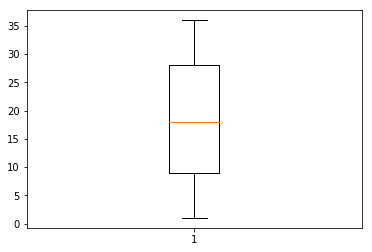

In [27]:
#boxplot to visualize the outliers
%matplotlib inline
plt.boxplot(df['ID'])

{'boxes': [<matplotlib.lines.Line2D at 0xf5bf898>],
 'caps': [<matplotlib.lines.Line2D at 0xf5c62e8>,
 'fliers': [<matplotlib.lines.Line2D at 0xf5c6f60>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xf5c6b38>],
 'whiskers': [<matplotlib.lines.Line2D at 0xf5bf9e8>,
  <matplotlib.lines.Line2D at 0xf5bfe80>]}

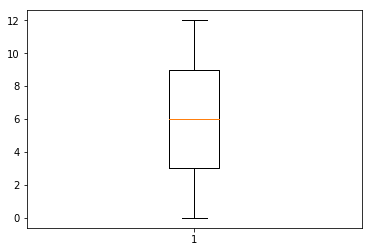

In [28]:
#boxplot to visualize the outliers
%matplotlib inline
plt.boxplot(df['Month of absence'])

{'boxes': [<matplotlib.lines.Line2D at 0xf819400>],
 'caps': [<matplotlib.lines.Line2D at 0xf819e10>,
 'fliers': [<matplotlib.lines.Line2D at 0xf822ac8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xf8226a0>],
 'whiskers': [<matplotlib.lines.Line2D at 0xf819550>,
  <matplotlib.lines.Line2D at 0xf8199e8>]}

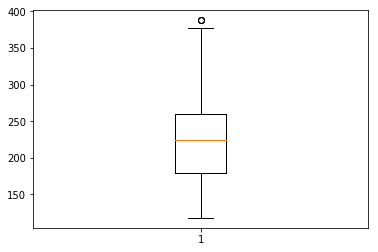

In [29]:
#boxplot
%matplotlib inline
plt.boxplot(df['Transportation expense'])

{'boxes': [<matplotlib.lines.Line2D at 0xf87db70>],
 'caps': [<matplotlib.lines.Line2D at 0xf8835c0>,
 'fliers': [<matplotlib.lines.Line2D at 0xf88e278>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xf883e10>],
 'whiskers': [<matplotlib.lines.Line2D at 0xf87dcc0>,
  <matplotlib.lines.Line2D at 0xf883198>]}

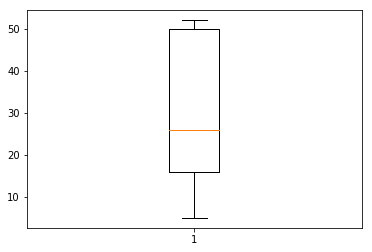

In [30]:
#boxplot
%matplotlib inline
plt.boxplot(df['Distance from Residence to Work'])

{'boxes': [<matplotlib.lines.Line2D at 0xf8dc978>],
 'caps': [<matplotlib.lines.Line2D at 0xf8e63c8>,
 'fliers': [<matplotlib.lines.Line2D at 0xf8ef080>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xf8e6c18>],
 'whiskers': [<matplotlib.lines.Line2D at 0xf8dcac8>,
  <matplotlib.lines.Line2D at 0xf8dcf60>]}

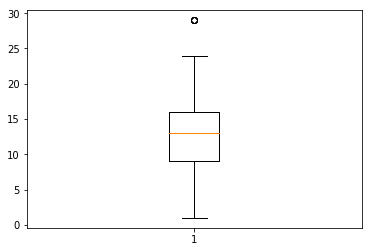

In [31]:
#boxplot
%matplotlib inline
plt.boxplot(df['Service time'])

{'boxes': [<matplotlib.lines.Line2D at 0xf946240>],
 'caps': [<matplotlib.lines.Line2D at 0xf946c50>,
 'fliers': [<matplotlib.lines.Line2D at 0xf94c908>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xf94c4e0>],
 'whiskers': [<matplotlib.lines.Line2D at 0xf946390>,
  <matplotlib.lines.Line2D at 0xf946828>]}

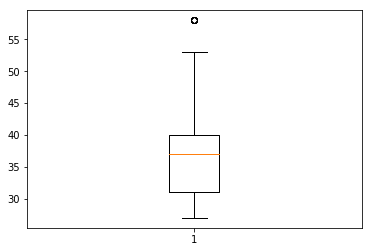

In [32]:
#boxplot
%matplotlib inline
plt.boxplot(df['Age'])

{'boxes': [<matplotlib.lines.Line2D at 0x10d7bf98>],
 'caps': [<matplotlib.lines.Line2D at 0x10d849e8>,
 'fliers': [<matplotlib.lines.Line2D at 0x10d8c6a0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x10d8c278>],
 'whiskers': [<matplotlib.lines.Line2D at 0x10d84128>,
  <matplotlib.lines.Line2D at 0x10d84630>]}

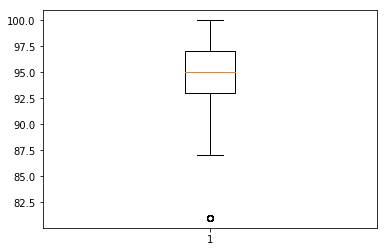

In [34]:
#boxplot
%matplotlib inline
plt.boxplot(df['Hit target'])

{'boxes': [<matplotlib.lines.Line2D at 0x10de3cc0>],
 'caps': [<matplotlib.lines.Line2D at 0x10dec710>,
 'fliers': [<matplotlib.lines.Line2D at 0x10df53c8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x10decf60>],
 'whiskers': [<matplotlib.lines.Line2D at 0x10de3e10>,
  <matplotlib.lines.Line2D at 0x10dec2e8>]}

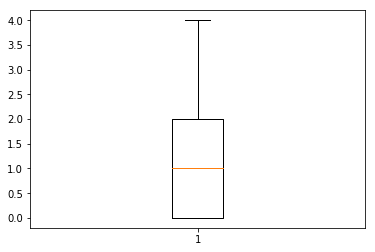

In [35]:
#boxplot
%matplotlib inline
plt.boxplot(df['Son'])

{'boxes': [<matplotlib.lines.Line2D at 0x10e4afd0>],
 'caps': [<matplotlib.lines.Line2D at 0x10e53a20>,
 'fliers': [<matplotlib.lines.Line2D at 0x10e5c6d8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x10e5c2b0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x10e53160>,
  <matplotlib.lines.Line2D at 0x10e535f8>]}

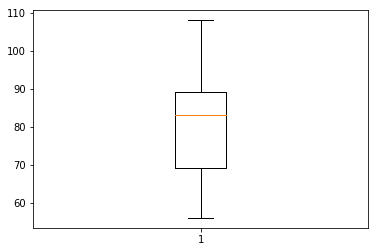

In [36]:
#boxplot
%matplotlib inline
plt.boxplot(df['Weight'])

{'boxes': [<matplotlib.lines.Line2D at 0x10eb23c8>],
 'caps': [<matplotlib.lines.Line2D at 0x10eb2dd8>,
 'fliers': [<matplotlib.lines.Line2D at 0x10ebba90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x10ebb668>],
 'whiskers': [<matplotlib.lines.Line2D at 0x10eb2518>,
  <matplotlib.lines.Line2D at 0x10eb29b0>]}

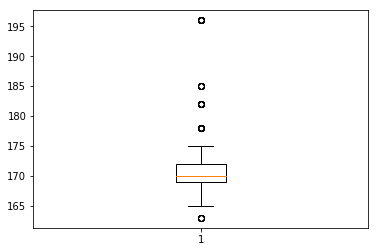

In [37]:
#boxplot
%matplotlib inline
plt.boxplot(df['Height'])

{'boxes': [<matplotlib.lines.Line2D at 0x10f12b70>],
 'caps': [<matplotlib.lines.Line2D at 0x10f1b5c0>,
 'fliers': [<matplotlib.lines.Line2D at 0x10f22278>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x10f1be10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x10f12cc0>,
  <matplotlib.lines.Line2D at 0x10f1b198>]}

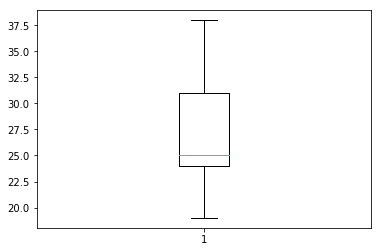

In [38]:
#boxplot
%matplotlib inline
plt.boxplot(df['Body mass index'])

In [39]:
#save continuous variable
cnames=['ID', 'Month of absence','Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
        'Son', 'Pet', 'Weight', 'Height', 'Body mass index']
      

In [40]:
#detect and delete outliers
for i in cnames:
    print(i)
    q75, q25= np.percentile(df.loc[:,i],[75,25])
    iqr=q75-q25
    
    min=q25-(iqr*1.5)
    max=q75+(iqr*1.5)
    print(min)
    print(max)
    
    df= df.drop(df[df.loc[:,i]<min].index)
    df=df.drop(df[df.loc[:,i]>max].index)
    

ID
-19.5
56.5
Month of absence
-6.0
18.0
Transportation expense
57.5
381.5
Distance from Residence to Work
-35.0
101.0
Service time
-1.5
26.5
Age
17.5
53.5
Work load Average/day 
-23.0
57.0
Hit target
87.0
103.0
Son
-3.0
5.0
Pet
-1.5
2.5
Weight
39.0
119.0
Height
164.5
176.5
Body mass index
11.0
43.0


In [56]:
df.shape

(740, 21)

In [42]:
#replace outliers with NA & try to impute with mising value analysis
q75,q25= np.percentile (df['Transportation expense'],[75,25])

In [43]:
#calculate iqr
iqr= q75-q25

In [44]:
iqr

81.0

In [45]:
#ineer & outer fance
min= q25-(iqr*1.5)
max=q75+(iqr*1.5)

In [46]:
min

57.5

In [47]:
max

381.5

In [48]:
#replacing all the outliers with the value NA
df.loc[df['Transportation expense'] < min, : 'Transportation expense'] = np.nan
df.loc[df['Transportation expense'] > max, : 'Transportation expense']= np.nan

In [49]:
#calaulcte the missing value
missing_val= pd.DataFrame(df.isnull().sum())

In [50]:
missing_val

,0
ID,0
Reason for absence,0
Month of absence,0
Day of the week,0
Seasons,0
Transportation expense,0
Distance from Residence to Work,0
Service time,0
Age,0
Work load Average/day,0


In [51]:
#impute with KNN to impute missing value 
df= pd.DataFrame(KNN(k=3).complete(df), columns=df.columns)

ValueError: Input matrix is not missing any values

In [52]:
df.shape

(556, 21)

In [57]:
#feature selection & feauture engineering
#correlation plot
df_corr= df.loc[:, cnames]

In [58]:
df_corr.shape

(740, 13)

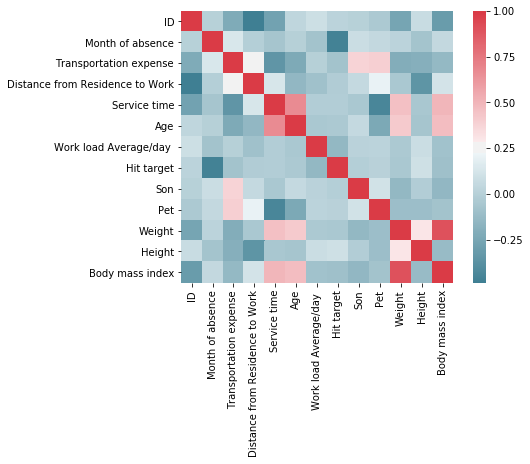

In [59]:
#plot the correlation plot
f,ax=plt.subplots(figsize=(7,5))

#generate or develop correlation matrix
corr= df_corr.corr()

#plot the seaborm library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap= sns.diverging_palette(220, 10, as_cmap= True), square= True, ax=ax)

In [60]:
#chi_square test of independece
#save categorical variable
cat_names=[ 'Reason for absence', 'Day of the week',
       'Seasons','Disciplinary failure', 'Education','Social drinker',
       'Social smoker']

In [61]:
#loop for the chi_sqaure Value
for i in cat_names:
    print(i)
    chi2, p, dof, ex=chi2_contingency(pd.crosstab(df['Absenteeism time in hours'],df[i]))
    print(p)

Reason for absence
5.6929209125065616e-70
Day of the week
0.0335239917836647
Seasons
5.84210399047505e-05
Disciplinary failure
4.375044921283115e-114
Education
1.0
Social drinker
2.128642459000793e-08
Social smoker
0.018742041906335


In [62]:
#delete those value which carrying redundent or irrelavant information from our master data
df=df.drop(['Weight', 'Education', 'Work load Average/day '], axis=1)

In [63]:
df.shape

(740, 18)

(array([ 53.,  72.,  87.,  53.,  64.,  54.,  68.,  54.,  53.,  70., 112.]),
 array([ 0.        ,  1.09090909,  2.18181818,  3.27272727,  4.36363636,
         5.45454545,  6.54545455,  7.63636364,  8.72727273,  9.81818182,
        10.90909091, 12.        ]),
 <a list of 11 Patch objects>)

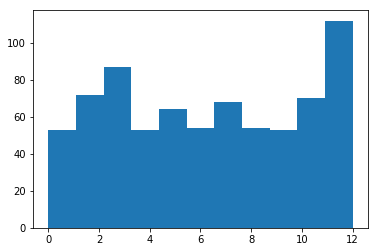

In [64]:
#feature scaling
%matplotlib inline
plt.hist(df['Month of absence'], bins='auto')

(array([ 92.,   0.,  36., 187.,   8.,   0., 156.,  54.,  46.,   6.,  89.,
          0.,  16.,   0.,  39.,  11.]),
 array([118.   , 134.875, 151.75 , 168.625, 185.5  , 202.375, 219.25 ,
        236.125, 253.   , 269.875, 286.75 , 303.625, 320.5  , 337.375,
        354.25 , 371.125, 388.   ]),
 <a list of 16 Patch objects>)

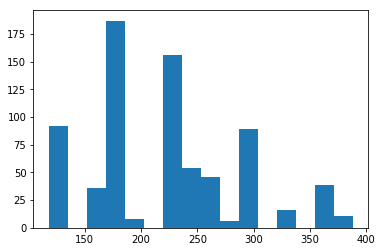

In [65]:
#feature scaling
%matplotlib inline
plt.hist(df['Transportation expense'], bins='auto')

In [66]:
#save continuous variable
cnames=['ID', 'Month of absence','Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Hit target',
        'Son', 'Pet', 'Height', 'Body mass index']
      

In [67]:
df.shape

(740, 18)

In [68]:
#normalization
for i in cnames:
    print(i)
    df[i]=(df[i]-min(df[i]))/(max(df[i])-min(df[i]))

ID


TypeError: 'numpy.float64' object is not callable

In [39]:
df.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Hit target,Disciplinary failure,Son,Social drinker,Social smoker,Pet,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,0.486216,19.204887,0.526529,3.914865,2.544595,0.382597,0.524066,0.412645,0.304839,0.714314,0.052703,0.254730,0.567568,0.072973,0.093243,0.276280,0.403985,6.989834
std,0.314893,8.434733,0.285998,1.421675,1.111831,0.247878,0.315676,0.156603,0.208993,0.200602,0.223590,0.274622,0.495749,0.260268,0.164782,0.182828,0.225626,13.359536
min,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.228571,13.000000,0.250000,3.000000,2.000000,0.225926,0.234043,0.285714,0.129032,0.631579,0.000000,0.000000,0.000000,0.000000,0.000000,0.181818,0.263158,2.000000
50%,0.485714,23.000000,0.500000,4.000000,3.000000,0.396296,0.446809,0.428571,0.322581,0.736842,0.000000,0.250000,1.000000,0.000000,0.000000,0.212121,0.315789,3.000000
75%,0.771429,26.000000,0.750000,5.000000,4.000000,0.525926,0.957447,0.535714,0.419355,0.842105,0.000000,0.500000,1.000000,0.000000,0.125000,0.272727,0.631579,8.000000
max,1.000000,28.000000,1.000000,6.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,120.000000


In [69]:
#Decision Tree
# divide the data into Train & test Data
train,test=train_test_split(df, test_size=0.2)

In [70]:
#decision tree for regression
fit_DT= DecisionTreeRegressor(max_depth=2).fit(train.iloc[:, 0:17], train.iloc[:, 17])

In [71]:
fit_DT

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [72]:
#apply mode on the tset data
prediction_DT=fit_DT.predict(test.iloc[:, 0:17])

In [73]:
prediction_DT

array([ 3.28000002,  3.28000002, 11.75924255, 11.75924255, 11.75924255,
        3.28000002,  3.28000002,  3.28000002, 11.75924255,  7.07016477,
        3.28000002,  3.28000002,  3.28000002, 11.75924255,  3.28000002,
        3.28000002, 11.75924255,  3.28000002, 11.75924255,  7.07016477,
        3.28000002,  3.28000002, 11.75924255, 11.75924255, 11.75924255,
        3.28000002, 11.75924255,  7.07016477, 11.75924255, 11.75924255,
        3.28000002,  3.28000002, 11.75924255,  3.28000002,  3.28000002,
        3.28000002,  3.28000002, 11.75924255,  3.28000002,  3.28000002,
        3.28000002,  3.28000002, 11.75924255, 11.75924255, 11.75924255,
       11.75924255,  3.28000002,  3.28000002,  3.28000002,  3.28000002,
        3.28000002, 11.75924255, 11.75924255,  3.28000002,  3.28000002,
        3.28000002,  3.28000002, 11.75924255,  3.28000002, 11.75924255,
       11.75924255,  3.28000002,  3.28000002,  3.28000002, 11.75924255,
       11.75924255,  3.28000002, 11.75924255, 11.75924255, 11.75

In [76]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [77]:
MSE= mean_squared_error(test.iloc[:,17], prediction_DT)

In [78]:
rootMeanSquaredError=sqrt(MSE)

In [79]:
#CALCULATE RMSE
print("RMSE:", rootMeanSquaredError)

RMSE: 10.137984336762157


In [80]:
#LINEAR REGRESSION
#import libraries for LR
import statsmodels.api as sm

#train the model using the training sets
model= sm.OLS(train.iloc[:,17], train.iloc[:, 0:17]).fit()

C:\New folder\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [81]:
#print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Absenteeism time in hours   R-squared:                       0.318
Model:                                   OLS   Adj. R-squared:                  0.298
Method:                        Least Squares   F-statistic:                     15.78
Date:                       Sun, 01 Jul 2018   Prob (F-statistic):           6.53e-38
Time:                               19:22:20   Log-Likelihood:                -2362.0
No. Observations:                        592   AIC:                             4758.
Df Residuals:                            575   BIC:                             4832.
Df Model:                                 17                                         
Covariance Type:                   nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
ID                                 -0.1469      0.067     -2.190      0.029      -0.279      -0.015
Reason for absence                 -0.4824      0.080     -6.032      0.000      -0.639      -0.325
Month of absence                    0.2853      0.192      1.487      0.137      -0.091       0.662
Day of the week                    -1.0542      0.399     -2.643      0.008      -1.838      -0.271
Seasons                            -0.0291      0.556     -0.052      0.958      -1.122       1.064
Transportation expense              0.0042      0.011      0.388      0.698      -0.017       0.026
Distance from Residence to Work    -0.1307      0.053     -2.462      0.014      -0.235      -0.026
Service time                       -0.0381      0.242     -0.157      0.875      -0.514       0.438
Age                                 0.2568      0.139      1.848      0.065      -0.016       0.530
Hit target                          0.2661      0.145      1.830      0.068      -0.020       0.552
Disciplinary failure              -13.1191      3.104     -4.227      0.000     -19.215      -7.023
Son                                 0.9581      0.577      1.660      0.097      -0.176       2.092
Social drinker                      2.9987      1.592      1.884      0.060      -0.128       6.126
Social smoker                      -0.7902      2.406     -0.328      0.743      -5.517       3.936
Pet                                -0.2822      0.544     -0.519      0.604      -1.351       0.786
Height                              0.0047      0.073      0.065      0.949      -0.139       0.149
Body mass index                    -0.4588      0.169     -2.721      0.007      -0.790      -0.128
==============================================================================
Omnibus:                      648.559   Durbin-Watson:                   2.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31945.522
Skew:                           5.234   Prob(JB):                         0.00
Kurtosis:                      37.431   Cond. No.                     1.75e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [82]:
#make the prediction by the model
prediction_LR= model.predict(test.iloc[:,0:17])

In [83]:
prediction_LR

666    -0.499282
492     1.617046
261    10.844311
30      8.248865
197     8.637800
234    -3.457742
617     0.455955
430     2.913219
139     9.638627
653    12.421358
480     1.975491
14      4.773510
34      5.836887
406     5.875376
443     1.520292
494     8.914495
439    21.656087
537     6.540888
542     7.513146
710     3.117874
84      9.210282
95      1.571611
56      4.504587
209     7.373709
28      8.400554
94      4.359179
75     15.374967
532     6.782156
739    11.713974
20     10.786422
         ...    
410    13.101548
341     4.744950
242     9.262323
292     3.781470
352    14.186373
549     4.999267
440     5.952759
694    10.660527
546    12.033583
302     3.850452
313     2.810349
233     7.311963
730     7.720720
533     1.331441
602    -0.720328
22      9.951535
42      5.067992
534    15.680294
541     7.852533
145    20.669532
67      0.535568
354     8.883039
278     5.910803
703     6.144609
435     1.878189
332    17.873502
108     5.333257
408    -0.6804

In [84]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [85]:
MSE= mean_squared_error(test.iloc[:,17], prediction_LR)

In [86]:
MSE

91.69142648375139

In [87]:
rootMeanSquaredError=sqrt(MSE)

In [88]:
#CALCULATE RMSE
print("RMSE:", rootMeanSquaredError)

RMSE: 9.5755640295364
